# Lab 2: Hand Gesture Recognition

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [40 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### Part 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) 

In [1]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
from torchvision import datasets, transforms # obtain data
import zipfile
import os

#torch.manual_seed(1) # set the random seed

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Lab_2_Hand_Gesture_Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Lab_3b_Gesture_Dataset:Test Set.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [5]:
# Specify transforms using torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize(224),transforms.CenterCrop(224),transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
#transform = transforms.Compose([transforms.Resize(224),transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
 # Load training & validation data
 data_dir ='/tmp/Lab_3b_Gesture_Dataset'

In [7]:
full_dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

In [8]:
# Split into training (70% and testing (30%) datasets)
train_size = int(0.7 * len(full_dataset))
val_size = len(full_dataset) - train_size

In [9]:
# use torch.utils.data.random_split for training/test split
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

In [10]:
# define a loader for the training data 
train_loader = torch.utils.data.DataLoader(train_dataset,shuffle=True)

In [11]:
# define a loader for the testing data 
val_loader = torch.utils.data.DataLoader(val_dataset,shuffle=True)

In [12]:
 # Load test data
 data_dir_test ='/tmp/Lab_3b_Gesture_Dataset:Test Set'

 full_dataset_test = torchvision.datasets.ImageFolder(root=data_dir_test, transform=transform)
 test_loader = torch.utils.data.DataLoader(full_dataset_test,shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

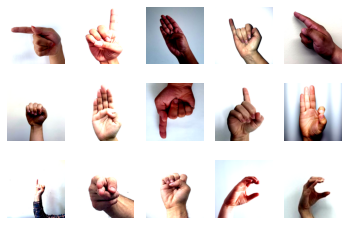

In [13]:
k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

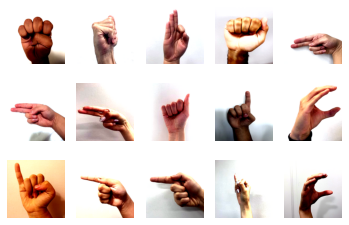

In [14]:
k = 0
for images, labels in val_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

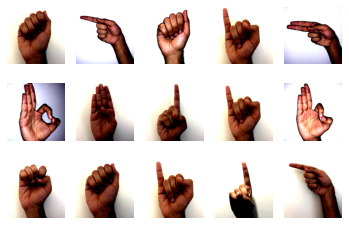

In [15]:
k = 0
for images, labels in test_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

In [16]:
len(train_loader),len(val_loader),len(test_loader)

(1701, 730, 27)

### Part 2. Model Building and Sanity Checking [10 pt]

### Part (a) Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [17]:
# The choice of ANN network that been selected is CNN. Total 2 layer of convolutional layer and 2 layer of fully connected layer.
# The number of input layer is 3 because of the RGB format on theinput images. THe output layer is different at both convolutional layers and its arbitrary.
# The pool size are also selected different at both the convolutional layer in order to reduce the dimensionality. Relu as activation functions is being used.
# Trying all this combinatio really helped to reduce the dimensionality of the fully connected layer to 13*13*20.

In [18]:
#variable that allows you to toggle between ANN and CNN architectures
#True => CNN, False => ANN
select_CNN = True

if not select_CNN:
  
  #Artificial Neural Network Architecture (aka MLP)
  class HandGesture(nn.Module):
      def __init__(self):
          super(HandGesture, self).__init__()
          self.fc1 = nn.Linear(224 * 224*3, 128*3)
          self.fc2 = nn.Linear(128*3, 128)
          self.fc3 = nn.Linear(128, 64)  
          self.fc4 = nn.Linear(64, 32) 
          self.fc5 = nn.Linear(32, 9) 

      def forward(self, img):
          flattened = img.view(-1, 224 * 224*3)
          activation1 = F.relu(self.fc1(flattened))
          activation2 = F.relu(self.fc2(activation1))
          activation3 = F.relu(self.fc3(activation2))
          activation4 = F.relu(self.fc4(activation3))
          output = self.fc5(activation4)
          return output
      
      print('Artificial Neural Network Architecture (aka MLP) Selected')
else:

  #Convolutional Neural Network Architecture
  class HandGesture(nn.Module):
      def __init__(self):
          super(HandGesture, self).__init__()
          self.name = "HandGesture"
          self.conv1 = nn.Conv2d(3, 10, 4,2) #in_channels, out_chanels, kernel_size,stride,padding
          self.pool1 = nn.MaxPool2d(3, 2) #kernel_size, stride 
          self.conv2 = nn.Conv2d(10, 20, 4,2) #in_channels, out_chanels, kernel_size,stride, padding
          self.pool2 = nn.MaxPool2d(2, 2) #kernel_size, stride 
          self.fc1 = nn.Linear(13*13*20, 500)
          self.fc2 = nn.Linear(500, 9)

      def forward(self, x):
          x = self.pool1(F.relu(self.conv1(x)))
          x = self.pool2(F.relu(self.conv2(x)))
          x = x.view(-1, 13*13*20)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x
      
      print('Convolutional Neural Network Architecture Selected')


Convolutional Neural Network Architecture Selected


In [19]:
hand_gesture = HandGesture()

In [20]:
for param in hand_gesture.parameters():
    print(param.shape)
    #print(param)

torch.Size([10, 3, 4, 4])
torch.Size([10])
torch.Size([20, 10, 4, 4])
torch.Size([20])
torch.Size([500, 3380])
torch.Size([500])
torch.Size([9, 500])
torch.Size([9])


### Part (b) Training Code - 4 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [ ]:
# Gradient descent is being used with the cross entropy loss as cost function, as these combination really helped to get a better result.

In [21]:
def train(model, train_loader, batch_size= 1, lr=0.01,num_epochs=1):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    train_loader = torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [22]:
def get_accuracy(model, train=False):
    if train:
        data = train_loader
    else:
        data = val_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

### Part (c) “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [23]:
#Created a small dataset from the provided dataset
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Lab_3b_Gesture_Dataset Sanity check.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [24]:
# Defined the different dataset for the sanity check
data_dir_sanity ='/tmp/Lab_3b_Gesture_Dataset Sanity check' 
full_dataset_sanity = torchvision.datasets.ImageFolder(root=data_dir_sanity, transform=transform)
train_size_sanity = int(0.7 * len(full_dataset_sanity))
val_size_sanity = len(full_dataset_sanity) - train_size_sanity
train_dataset_sanity, val_dataset_sanity = torch.utils.data.random_split(full_dataset_sanity, [train_size_sanity, val_size_sanity])
train_loader_sanity = torch.utils.data.DataLoader(train_dataset_sanity,shuffle=True)
val_loader_sanity = torch.utils.data.DataLoader(val_dataset_sanity,shuffle=True)

In [25]:
len(train_loader_sanity),len(val_loader_sanity)

(18, 9)

In [26]:
def get_accuracy_sanity(model, train=False):
    if train:
        data = train_loader_sanity
    else:
        data = val_loader_sanity

    correct = 0
    total = 0
    for imgs, labels in data:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [27]:
def train_sanity(model, train_loader, batch_size= 1, lr=0.01,num_epochs=1):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    train_loader = torch.utils.data.DataLoader(train_dataset_sanity,shuffle=True,batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy_sanity(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy_sanity(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    

CUDA is available!  Training on GPU ...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


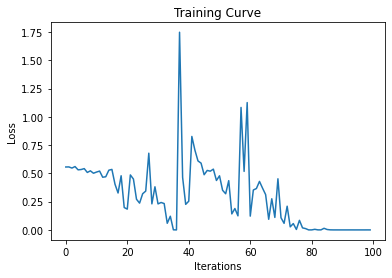

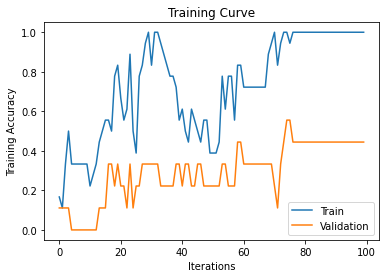

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.4444444444444444


In [28]:
use_cuda = True

model = HandGesture()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


#proper model
train_sanity(model, train_loader_sanity, batch_size=4,lr=0.01,num_epochs=20)

### Part 3. Hyperparameter Search [8 pt]

### Part (a) - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

Batch_size , learning rate and Number of epoch are the parameters which are deciding different accuracy and training time. 

### Part (b) - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

In [ ]:
len(train_loader),len(val_loader)

(1701, 730)

CUDA is available!  Training on GPU ...


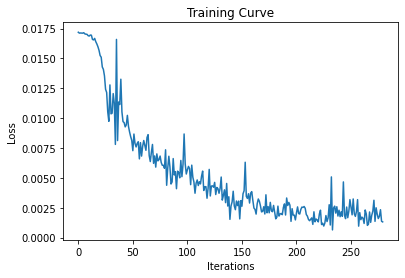

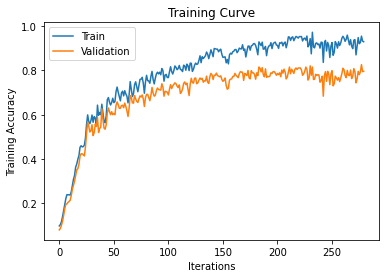

Final Training Accuracy: 0.9294532627865961
Final Validation Accuracy: 0.7958904109589041


In [ ]:
use_cuda = True

model = HandGesture()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


#proper model
train(model, train_loader, batch_size=128,lr=0.01,num_epochs=20)

CUDA is available!  Training on GPU ...


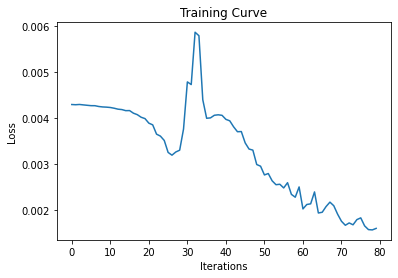

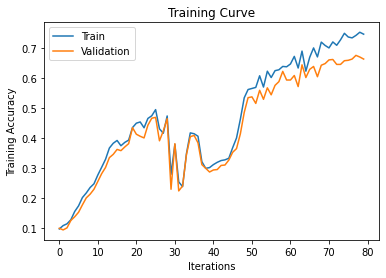

Final Training Accuracy: 0.746031746031746
Final Validation Accuracy: 0.663013698630137


In [ ]:
use_cuda = True

model = HandGesture()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


#proper model
train(model, train_loader, batch_size=512,lr=0.01,num_epochs=20)

CUDA is available!  Training on GPU ...


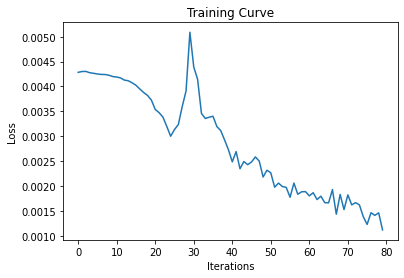

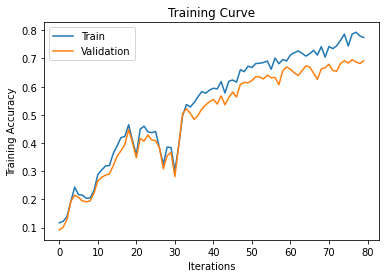

Final Training Accuracy: 0.7742504409171076
Final Validation Accuracy: 0.6917808219178082


In [ ]:
use_cuda = True

model = HandGesture()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


#proper model
train(model, train_loader, batch_size=512,lr=0.001,num_epochs=20)

CUDA is available!  Training on GPU ...


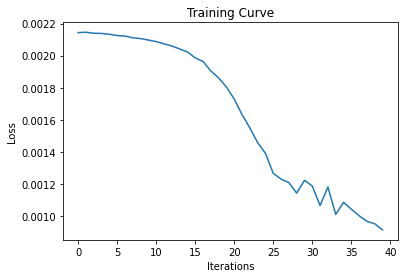

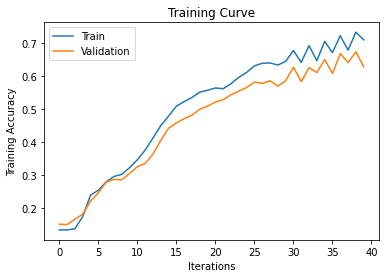

Final Training Accuracy: 0.7101704879482658
Final Validation Accuracy: 0.6287671232876713


In [ ]:
use_cuda = True

model = HandGesture()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


#proper model
train(model, train_loader, batch_size=1024,lr=0.01,num_epochs=20)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

batch_size=128,lr=0.01,num_epochs=20 is the model which is having maximum validation accuracy

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
def get_accuracy_test(model, train=False):
    if train:
        data = train_loader
    else:
        data = test_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train_test(model, train_loader, batch_size= 1, lr=0.01,num_epochs=1):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    train_loader = torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy_test(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy_test(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Testing")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Test Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...


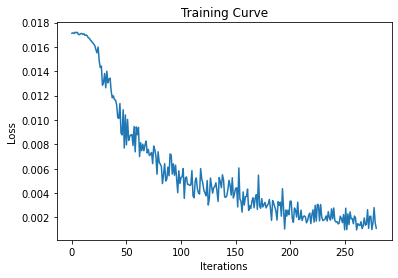

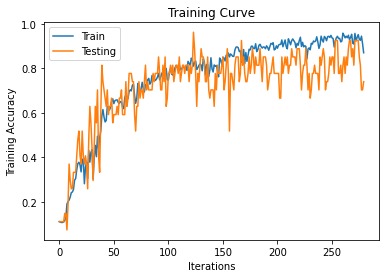

Final Training Accuracy: 0.8706643151087595
Final Test Accuracy: 0.7407407407407407


In [ ]:
use_cuda = True

model = HandGesture()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


#proper model
train_test(model, train_loader, batch_size=128,lr=0.01,num_epochs=20)

The fluctuation in the test accuracy plot is due to the small dataset that is being tested. Also the test accuracy is lower than the validation accuracy which make sense because of the arbitrary nature of the test set.

### Part 4. Transfer Learning [12 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 3 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [29]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
#features = alexnet.features(img)

In [30]:
torch.manual_seed(1) # set the random seed


# obtain one batch of training images
dataiter_train = iter(train_loader)
images_train, labels = dataiter_train.next()

# confirm output from AlexNet feature extraction
alexNet = torchvision.models.alexnet(pretrained=True)
features_train = alexNet.features(images_train)
features_train.shape
  

torch.Size([1, 256, 6, 6])

In [31]:
torch.manual_seed(1) # set the random seed


# obtain one batch of validation images
dataiter_val = iter(val_loader)
images_val, labels = dataiter_val.next()

# confirm output from AlexNet feature extraction
alexNet = torchvision.models.alexnet(pretrained=True)
features_val = alexNet.features(images_val)
features_val.shape
  

torch.Size([1, 256, 6, 6])

In [32]:
torch.manual_seed(1) # set the random seed


# obtain one batch of testing images
dataiter_test = iter(test_loader)
images_test, labels = dataiter_test.next()

# confirm output from AlexNet feature extraction
alexNet = torchvision.models.alexnet(pretrained=True)
features_test = alexNet.features(images_test)
features_test.shape
  

torch.Size([1, 256, 6, 6])

In [33]:
target_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [34]:
def Handgesture_tensor_features(dataloader, name):
  for i ,data in enumerate(dataloader):
    img, label = data
    features = alexnet.features(img)
    tensor = torch.from_numpy(features.detach().numpy()) # Converting AlexNet feature tensor into a numpy array, and then back into a PyTorch tensor.
    main_dir = 'Handgesture_tensor_features/' # Storing all the tensor data for each data set
    if not os.path.isdir(main_dir):
      os.mkdir(main_dir)
    Folder = main_dir + name + '/' # Assiging folder name
    if not os.path.isdir(Folder):
      os.mkdir(Folder)
    sub_folder = Folder +  target_classes[label]+'/'  # Assiging sub_folder name for the targets
    if not os.path.isdir(sub_folder):
      os.mkdir(sub_folder)
    torch.save(tensor.squeeze(0),sub_folder+ str(i)+'.tensor')

In [35]:
Handgesture_tensor_features(train_loader,'train') #creating & saving tensor folder for training set

In [36]:
Handgesture_tensor_features(val_loader,'val') #creating & saving tensor folder for validation set

In [37]:
Handgesture_tensor_features(test_loader,'test') #creating & saving tensor folder for test set

In [40]:
tensor_dir = "/content/Handgesture_tensor_features/" # Location of the main folder saving all the dataset

In [41]:
# Uploading the data set in torch format and assigning as per the training network
train_data = torchvision.datasets.DatasetFolder(tensor_dir + 'train', loader= torch.load, extensions= '.tensor')
train_loader_feature = torch.utils.data.DataLoader(train_data, batch_size=64,shuffle=True)

In [43]:
val_data = torchvision.datasets.DatasetFolder(tensor_dir + 'val',  loader= torch.load, extensions= '.tensor')
val_loader_feature = torch.utils.data.DataLoader(val_data,shuffle=True)

In [44]:
test_data = torchvision.datasets.DatasetFolder(tensor_dir + 'test',  loader= torch.load, extensions= '.tensor')
test_loader_feature = torch.utils.data.DataLoader(test_data,shuffle=True)

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
#output = model(features)
#prob = F.softmax(output)

In [ ]:
# Fully connected linear network is being selected with 3 layers. Relu is being used as the activation function. No pooling layer selected

In [45]:
#Artifical Neural Network Architecture
class HandAlex(nn.Module):
    def __init__(self):
        super(HandAlex, self).__init__()
        self.fc1 = nn.Linear(256 * 6 * 6, 5000)
        self.fc2 = nn.Linear(5000, 500)
        self.fc3 = nn.Linear(500, 9)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [46]:
model= HandAlex()

In [47]:
def get_accuracy_alex(model, data_loader):
   
    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        #imgs = alexNet.features(imgs) 
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [48]:
def train(model, train_loader,val_loader, batch_size=20,lr= 0.01, num_epochs=1):
  
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)#, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
            #imgs = features = alexNet.features(imgs) #SLOW
            #print(n)
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy_alex(model, train_loader)) # compute training accuracy 
            val_acc.append(get_accuracy_alex(model, val_loader))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    

### Part (c) - 3 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

CUDA is available!  Training on GPU ...


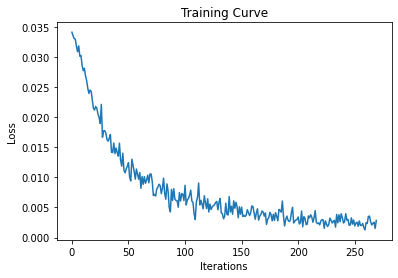

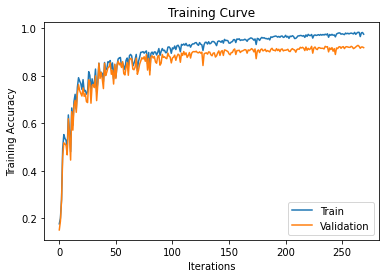

Final Training Accuracy: 0.975896531452087
Final Validation Accuracy: 0.9191780821917809


In [52]:
use_cuda = True

model = HandAlex()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model, train_loader_feature,val_loader_feature,batch_size= 64,lr = 0.01, num_epochs=10)

In [ ]:
#tensor = torch.from_numpy(tensor.detach().numpy())

### Part (d) - 3 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

CUDA is available!  Training on GPU ...


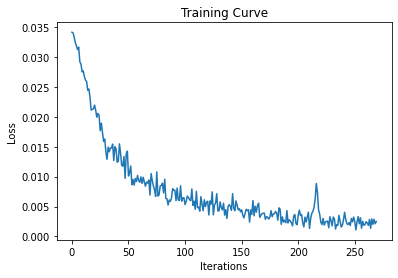

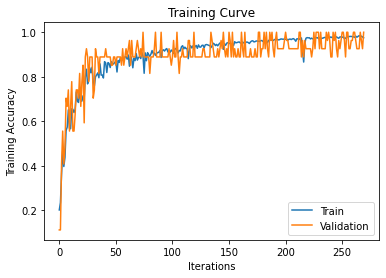

Final Training Accuracy: 0.9747207524985303
Final Validation Accuracy: 1.0


In [53]:
use_cuda = True

model = HandAlex()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model, train_loader_feature,test_loader_feature,batch_size= 64,lr = 0.01, num_epochs=10)

In [55]:
# The test accuracy can be average out to be in between ~95% which is much higher than the previous one. Too much fluctuation 
# are due to the small size of the testing sample dataset

### Part 5. Testing on New Data [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?

This question will also be evaluated on the overal performance achieved.

In [ ]:
# The test accuracy can be averaged out to be in between 95%-100% with the transfer learning method and its much more higher than been delveloped in
# part 3 with an average accuracy in between 75%-80%. The output shown is the final accuracy, which can not be taken as the overall accruacy. 
# Further, the proper explanation can be :
  # (a). There are not enough neurons or layers in my CNN.
  # (b). The output features from the convolutional layer are not properly trained due to less hyperparameter testing or tuning.
  # (c). The deeper the neurons, the better the accuracy.
  # (d). Also the training dataset is not big enough to train with accuracy of 95% as what we got in the transfer learning method wher millions of images was used to train the CNN network(Alex ANN)

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html /content/LAB_2_Hand_Gesture_Recognition.ipynb

[NbConvertApp] Converting notebook /content/LAB_2_Hand_Gesture_Recognition.ipynb to html
[NbConvertApp] Writing 1204256 bytes to /content/LAB_2_Hand_Gesture_Recognition.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus